In [100]:
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
from datetime import datetime
import data_processing as dp

In [101]:
bike_weather_data = dp.read_and_connect_data(city_name = 'boston', start = datetime(2023, 1, 1), end = datetime(2023, 1, 31))
bike_weather_data = dp.feature_engineering(bike_weather_data)
pca_of_bike_weather_data = dp.apply_pca(bike_weather_data)

In [102]:
X = bike_weather_data
X_pca_5 = dp.apply_pca(X)
X_pca_9 = dp.apply_pca(X, n_components = 9)

In [103]:
iso_forest = IsolationForest(contamination=0.005, n_estimators=500, max_samples=0.6, max_features=0.9) 
bike_weather_data['anomaly'] = iso_forest.fit_predict(pca_of_bike_weather_data)

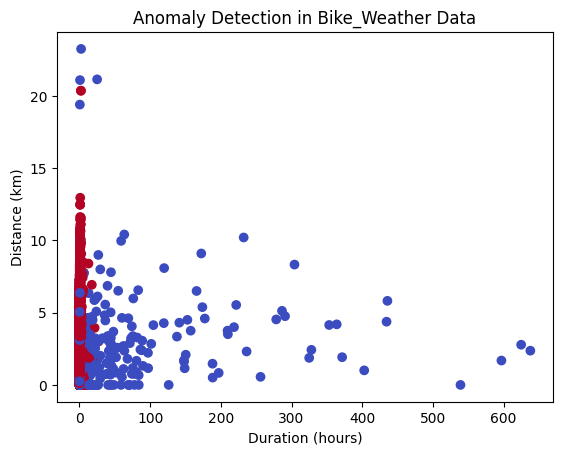

    tripduration  distance  user_type_encoded     speed  temp  wspd  prcp  \
7           1693  0.000000                  0  0.000000  11.1  13.0   1.2   
8           1689  0.000000                  0  0.000000  11.1  13.0   1.2   
9           1615  0.000000                  0  0.000000  11.1  13.0   1.2   
32          8338  1.995237                  0  0.861460  11.1  11.2   0.3   
42         50966  2.357588                  0  0.166529  11.1  11.2   0.3   

    coco  start_hour  start_dayofweek  start_month  end_hour  end_dayofweek  \
7    7.0           0                6            1         0              6   
8    7.0           0                6            1         0              6   
9    7.0           0                6            1         0              6   
32   7.0           0                6            1         2              6   
42   7.0           0                6            1        14              6   

    end_month  anomaly  
7           1       -1  
8           

In [104]:
# Visualize the anomalies (1 = normal, -1 = anomaly)
plt.scatter(bike_weather_data['tripduration'] / 3600, bike_weather_data['distance'], c=bike_weather_data['anomaly'], cmap='coolwarm')

# plt.xlim(0, 50)

plt.xlabel('Duration (hours)')
plt.ylabel('Distance (km)')
plt.title('Anomaly Detection in Bike_Weather Data')
plt.show()

# Print detected anomalies
anomalies = bike_weather_data[bike_weather_data['anomaly'] == -1]
print(anomalies.head())

In [105]:
anomalies.shape

(702, 15)

In [106]:
print(anomalies['coco'].mean())
print(bike_weather_data[bike_weather_data['anomaly'] == 1]['coco'].mean())

5.72934472934473
4.069214683682092


# Compare Normal data vs PCA with parameters used in unsupervised_fs

In [107]:
iso_forest = IsolationForest(n_estimators=100, max_samples=1024, contamination='auto') 
bike_weather_data['anomaly'] = iso_forest.fit_predict(X)

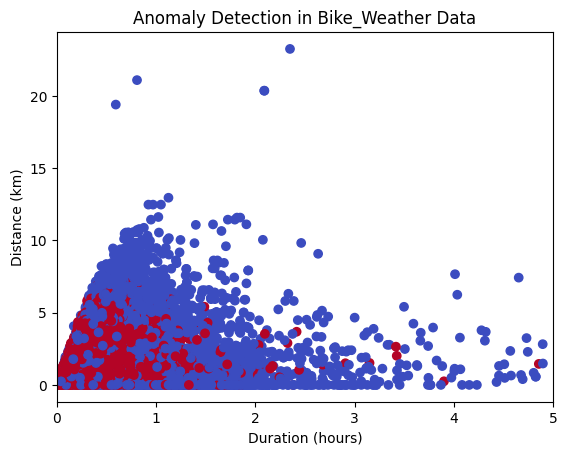

   tripduration  distance  user_type_encoded     speed  temp  wspd  prcp  \
0           250  0.464383                  1  6.687112  11.1  13.0   1.2   
1           489  0.970031                  0  7.141336  11.1  13.0   1.2   
2           461  0.970031                  0  7.575083  11.1  13.0   1.2   
3          1065  0.585427                  0  1.978907  11.1  13.0   1.2   
4           601  1.136817                  1  6.809552  11.1  13.0   1.2   

   coco  start_hour  start_dayofweek  start_month  end_hour  end_dayofweek  \
0   7.0           0                6            1         0              6   
1   7.0           0                6            1         0              6   
2   7.0           0                6            1         0              6   
3   7.0           0                6            1         0              6   
4   7.0           0                6            1         0              6   

   end_month  anomaly  
0          1       -1  
1          1       -1  
2 

In [108]:
# Visualize the anomalies (1 = normal, -1 = anomaly)
plt.scatter(bike_weather_data['tripduration'] / 3600, bike_weather_data['distance'], c=bike_weather_data['anomaly'], cmap='coolwarm')

plt.xlim(0, 5)

plt.xlabel('Duration (hours)')
plt.ylabel('Distance (km)')
plt.title('Anomaly Detection in Bike_Weather Data')
plt.show()

# Print detected anomalies
anomalies = bike_weather_data[bike_weather_data['anomaly'] == -1]
print(anomalies.head())

In [109]:
anomalies.shape

(18940, 15)

In [110]:
print(anomalies['coco'].mean())
print(bike_weather_data[bike_weather_data['anomaly'] == 1]['coco'].mean())

6.935110876451954
3.63169686985173


In [111]:
iso_forest = IsolationForest(n_estimators=100, max_samples=1024, contamination='auto') 
bike_weather_data['anomaly'] = iso_forest.fit_predict(X_pca_5)

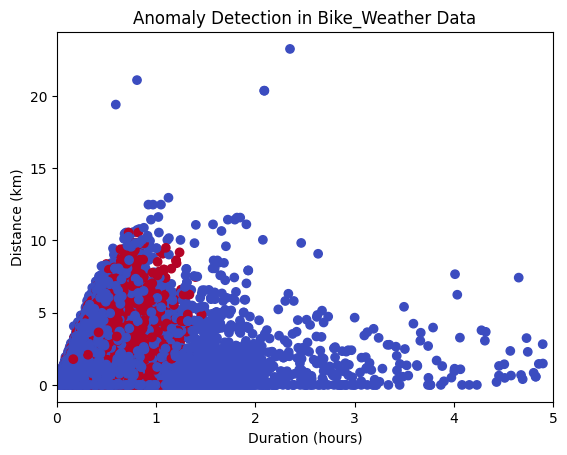

   tripduration  distance  user_type_encoded     speed  temp  wspd  prcp  \
0           250  0.464383                  1  6.687112  11.1  13.0   1.2   
1           489  0.970031                  0  7.141336  11.1  13.0   1.2   
2           461  0.970031                  0  7.575083  11.1  13.0   1.2   
3          1065  0.585427                  0  1.978907  11.1  13.0   1.2   
4           601  1.136817                  1  6.809552  11.1  13.0   1.2   

   coco  start_hour  start_dayofweek  start_month  end_hour  end_dayofweek  \
0   7.0           0                6            1         0              6   
1   7.0           0                6            1         0              6   
2   7.0           0                6            1         0              6   
3   7.0           0                6            1         0              6   
4   7.0           0                6            1         0              6   

   end_month  anomaly  
0          1       -1  
1          1       -1  
2 

In [112]:
# Visualize the anomalies (1 = normal, -1 = anomaly)
plt.scatter(bike_weather_data['tripduration'] / 3600, bike_weather_data['distance'], c=bike_weather_data['anomaly'], cmap='coolwarm')

plt.xlim(0, 5)

plt.xlabel('Duration (hours)')
plt.ylabel('Distance (km)')
plt.title('Anomaly Detection in Bike_Weather Data')
plt.show()

# Print detected anomalies
anomalies = bike_weather_data[bike_weather_data['anomaly'] == -1]
print(anomalies.head())

In [113]:
anomalies.shape

(10403, 15)

In [114]:
print(anomalies['coco'].mean())
print(bike_weather_data[bike_weather_data['anomaly'] == 1]['coco'].mean())

5.344323752763626
3.976096108113932


In [115]:
iso_forest = IsolationForest(n_estimators=100, max_samples=1024, contamination='auto') 
bike_weather_data['anomaly'] = iso_forest.fit_predict(X_pca_9)

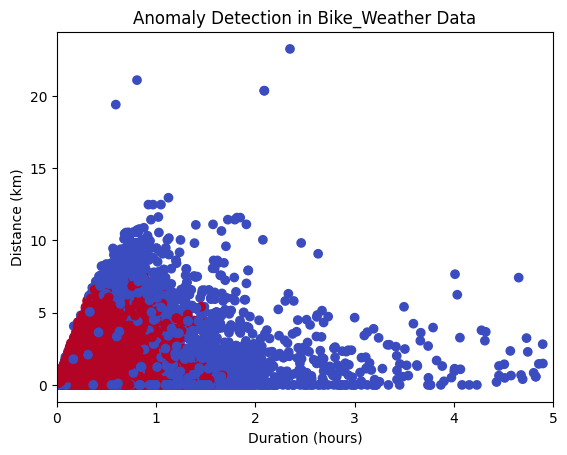

   tripduration  distance  user_type_encoded     speed  temp  wspd  prcp  \
0           250  0.464383                  1  6.687112  11.1  13.0   1.2   
1           489  0.970031                  0  7.141336  11.1  13.0   1.2   
2           461  0.970031                  0  7.575083  11.1  13.0   1.2   
3          1065  0.585427                  0  1.978907  11.1  13.0   1.2   
4           601  1.136817                  1  6.809552  11.1  13.0   1.2   

   coco  start_hour  start_dayofweek  start_month  end_hour  end_dayofweek  \
0   7.0           0                6            1         0              6   
1   7.0           0                6            1         0              6   
2   7.0           0                6            1         0              6   
3   7.0           0                6            1         0              6   
4   7.0           0                6            1         0              6   

   end_month  anomaly  
0          1       -1  
1          1       -1  
2 

In [116]:
# Visualize the anomalies (1 = normal, -1 = anomaly)
plt.scatter(bike_weather_data['tripduration'] / 3600, bike_weather_data['distance'], c=bike_weather_data['anomaly'], cmap='coolwarm')

plt.xlim(0, 5)

plt.xlabel('Duration (hours)')
plt.ylabel('Distance (km)')
plt.title('Anomaly Detection in Bike_Weather Data')
plt.show()

# Print detected anomalies
anomalies = bike_weather_data[bike_weather_data['anomaly'] == -1]
print(anomalies.head())

In [117]:
anomalies.shape

(6345, 15)

In [118]:
print(anomalies['coco'].mean())
print(bike_weather_data[bike_weather_data['anomaly'] == 1]['coco'].mean())

7.0962962962962965
3.9345721855293108
